/var/folders/3m/gq6dpqj94vvd72cp8579k_fr0000gn/T/ipykernel_3079/193002481.py:26: RuntimeWarning: divide by zero encountered in divide
  ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)
/var/folders/3m/gq6dpqj94vvd72cp8579k_fr0000gn/T/ipykernel_3079/193002481.py:26: RuntimeWarning: invalid value encountered in divide
  ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)


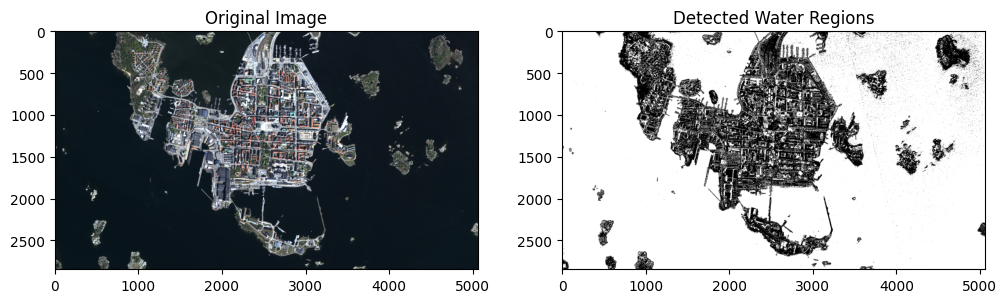

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_ndwi(image):
    """
    Calculate the Normalized Difference Water Index (NDWI) for a given satellite image.
    
    NDWI = (G - NIR) / (G + NIR)
    
    Parameters:
    image (numpy array): The satellite image in BGR format
    
    Returns:
    ndwi (numpy array): The calculated NDWI
    """
    # Split the image into B, G, R channels
    B, G, R = cv2.split(image)
    
    # Simulate NIR (Near Infrared) channel for the sake of this example
    # In real satellite images, NIR would be a separate band.
    # Here we just use the red channel as a placeholder for NIR.
    NIR = R
    
    # Calculate NDWI
    ndwi = (G.astype(float) - NIR.astype(float)) / (G + NIR)
    
    return ndwi

def detect_water(image, threshold=0.1):
    """
    Detect water in a satellite image using NDWI.
    
    Parameters:
    image (numpy array): The satellite image in BGR format
    threshold (float): The NDWI threshold to classify water
    
    Returns:
    water_mask (numpy array): The binary mask of detected water regions
    """
    ndwi = calculate_ndwi(image)
    
    # Apply threshold to create a binary mask of water regions
    water_mask = np.where(ndwi > threshold, 1, 0).astype(np.uint8)
    
    return water_mask

# Load the satellite image
image = cv2.imread('../satellite-images/Karlskrona.jpg')

# Detect water in the image
water_mask = detect_water(image, threshold=0.1)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Detected Water Regions')
plt.imshow(water_mask, cmap='gray')

plt.show()


In [15]:
def dilate_image(binary_image, kernel_size=3, iterations=1):
    """
    Perform dilation on a binary image.
    
    Parameters:
    binary_image (numpy array): The binary image to be dilated
    kernel_size (int): Size of the structuring element
    iterations (int): Number of times dilation is applied
    
    Returns:
    dilated_image (numpy array): The dilated binary image
    """
    # Create a structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Apply dilation
    dilated_image = cv2.dilate(binary_image, kernel, iterations=iterations)
    
    return dilated_image

In [16]:

def erode_image(binary_image, kernel_size=3, iterations=1):
    """
    Perform erosion on a binary image.
    
    Parameters:
    binary_image (numpy array): The binary image to be eroded
    kernel_size (int): Size of the structuring element
    iterations (int): Number of times erosion is applied
    
    Returns:
    eroded_image (numpy array): The eroded binary image
    """
    # Create a structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Apply erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=iterations)
    
    return eroded_image

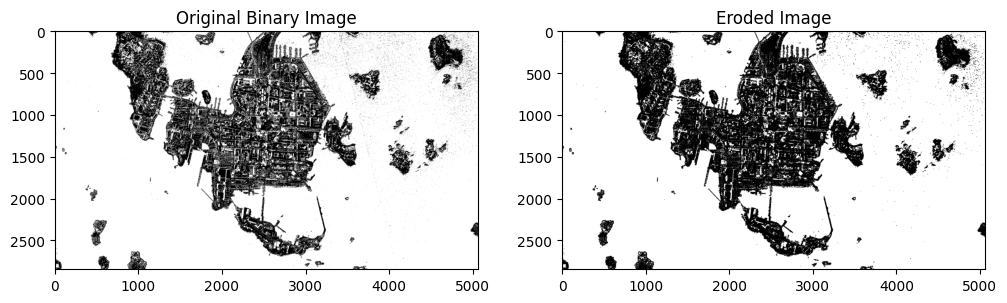

In [17]:
# Load a binary image
binary_image = water_mask

# Ensure the image is binary (0 or 255)
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Perform erosion

# eroded_image = erode_image(binary_image, kernel_size=3, iterations=1)
eroded_image = dilate_image(binary_image, kernel_size=2, iterations=2)

eroded_image = erode_image(eroded_image, kernel_size=3, iterations=2)
# eroded_image = dilate_image(eroded_image, kernel_size=2, iterations=2)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')

plt.show()


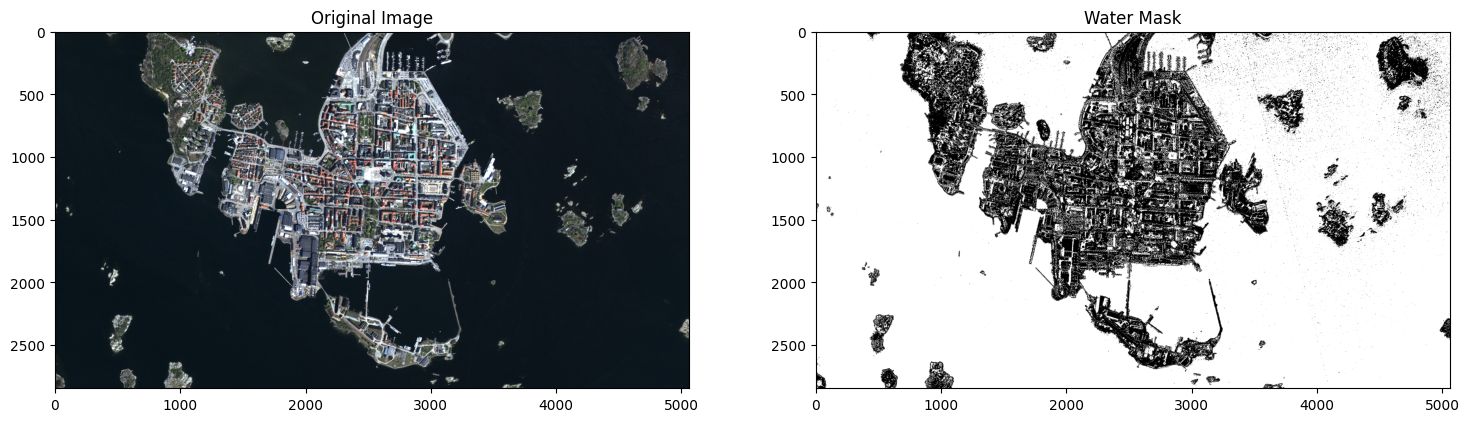

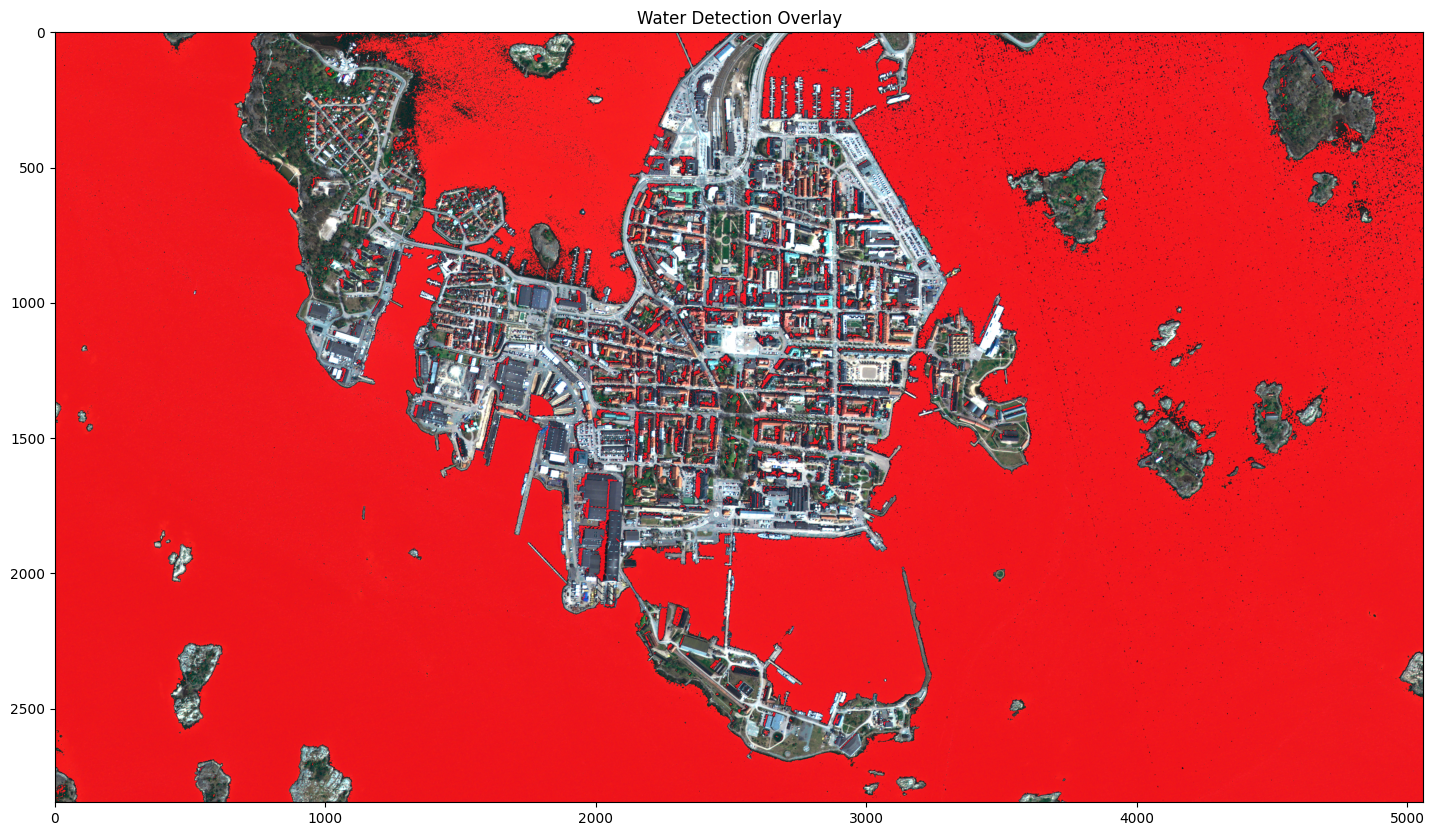

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming `water_mask` and `original_image` are already defined in your notebook

# Create a color mask for the water (red)
color_mask = np.zeros_like(image)
color_mask[:, :, 2] = 255  # Red channel

# Ensure the water mask is binary (0 or 1)
binary_water_mask = (water_mask > 0).astype(np.uint8)

# Create a transparent overlay
alpha = 0.9
overlay = cv2.addWeighted(image, 1, color_mask, alpha, 0, dtype=cv2.CV_32F)

# Apply the mask
masked_overlay = np.where(binary_water_mask[..., None], overlay, image)

# Display the original image, water mask, and the masked overlay
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Water Mask')
plt.imshow(water_mask, cmap='gray')


plt.figure(figsize=(20, 10))
plt.title('Water Detection Overlay')
plt.imshow(cv2.cvtColor(masked_overlay.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()